In [2]:
# Importing the nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Make sure the folder of data is in the same directory of this notebook

# files = os.listdir('./uber-pickups-in-new-york-city-20210918T124704Z-001/uber-pickups-in-new-york-city/')

# but we need the last seven files

files = os.listdir('./uber-pickups-in-new-york-city/')[-7:]
print(files)


['uber-raw-data-may14.csv', 'uber-raw-data-janjune-15.csv', 'uber-raw-data-jul14.csv']


['uber-raw-data-may14.csv', 'uber-raw-data-jul14.csv']

In [6]:
# Let's read some data:
df = pd.read_csv('./uber-pickups-in-new-york-city/' + files[0])
df.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


This data contains the date of trip and latitude and lontitude 

In [76]:
# Now let's merge the data 
final = pd.DataFrame()

for file in files:
    df = pd.read_csv('./uber-pickups-in-new-york-city/' + file, encoding='utf-8')
    final = pd.concat([final, df])
    

In [77]:
final.shape

(4534327, 4)

In [78]:
final.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


###  Data Preparation¶
##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

In [79]:
df=final.copy()

In [80]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [81]:
df.shape

(4534327, 4)

In [82]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [83]:
# Changing the Date/Time type 
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [84]:
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour
df['MonthName']=df['Date/Time'].dt.month_name()

In [85]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,MonthName
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0,April
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0,April
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0,April
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0,April
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0,April


In [86]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [87]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [88]:
df['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [89]:
# pip install plotly

In [90]:
import plotly.express as px

In [91]:
px.bar(x=df['weekday'].value_counts().index,
      y=df['weekday'].value_counts().values
      )

### The First Questions:
1. Analyse by Hour

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

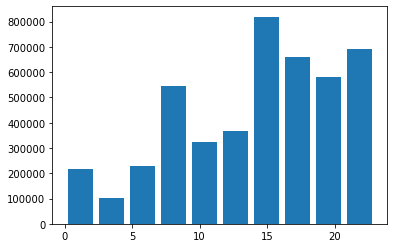

In [92]:
plt.hist(df['hour'], rwidth=0.8)

#### It peaks during evening time when people are logging off from work

In [93]:
for i,month in enumerate(df['month'].unique()):
    print(month)

4
8
7
6
5
9


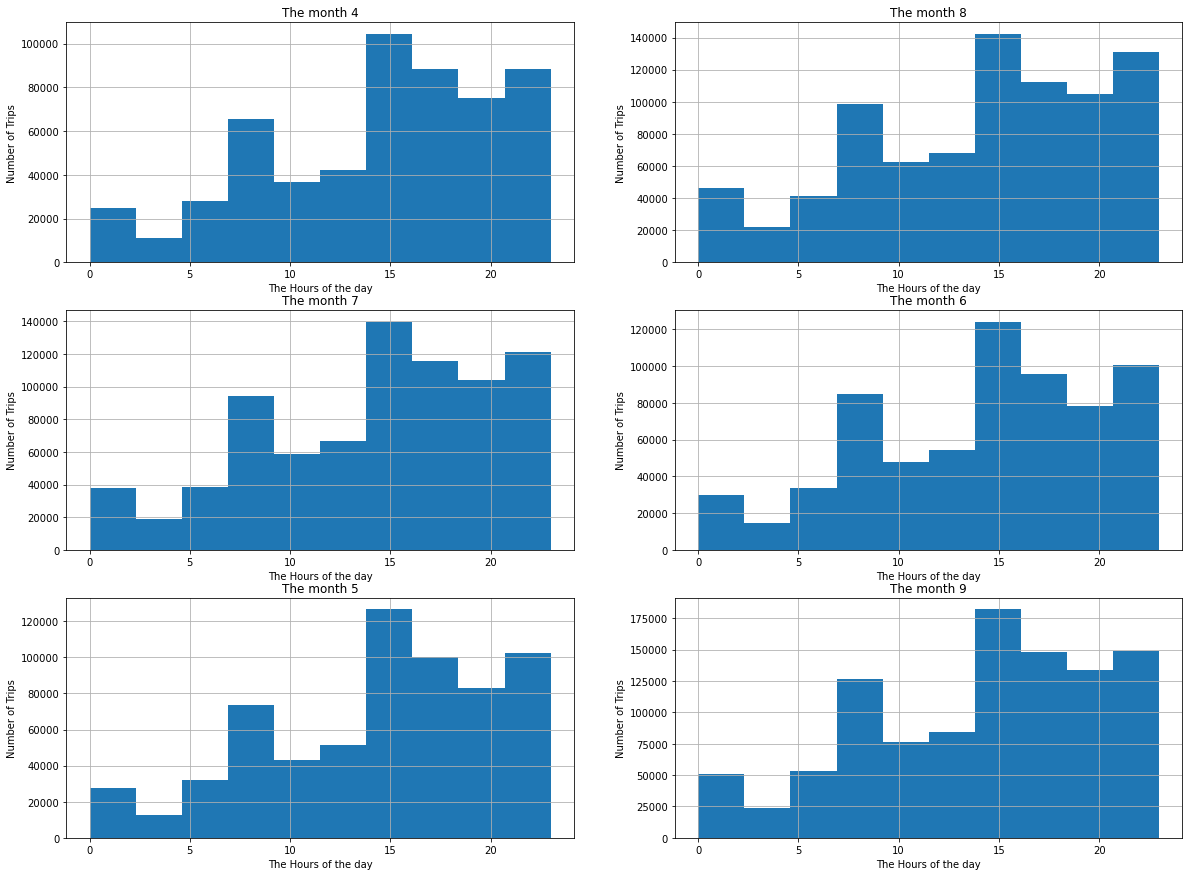

In [94]:
## Ploting Hour data regarding to each month:

plt.figure(figsize=(20,15))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    plt.title(f'The month {month}')
    plt.xlabel('The Hours of the day')
    plt.ylabel('Number of Trips')
    df[df['month']==month]['hour'].hist()

### Questions:
1. Analysis of which month has the max rides
2. Analysis of Journey of Each Day

In [95]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,MonthName
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0,April
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0,April
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0,April
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0,April
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0,April


### Importing the nessary libraries:

In [96]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import chart_studio.plotly as py

In [97]:
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

***
### Analysis of which month has the max rides

In [98]:
trace1 = go.Bar(
    x = df.groupby('month')['hour'].count().index,
    y = df.groupby('month')['hour'].count(),
    name= 'Priority'
)

In [99]:
iplot([trace1])

### From the figure the month 9 has the most rides' hours
***

***
### Analysis of Journey of Each Day

Text(0.5, 1.0, 'Number of Journeys by month day')

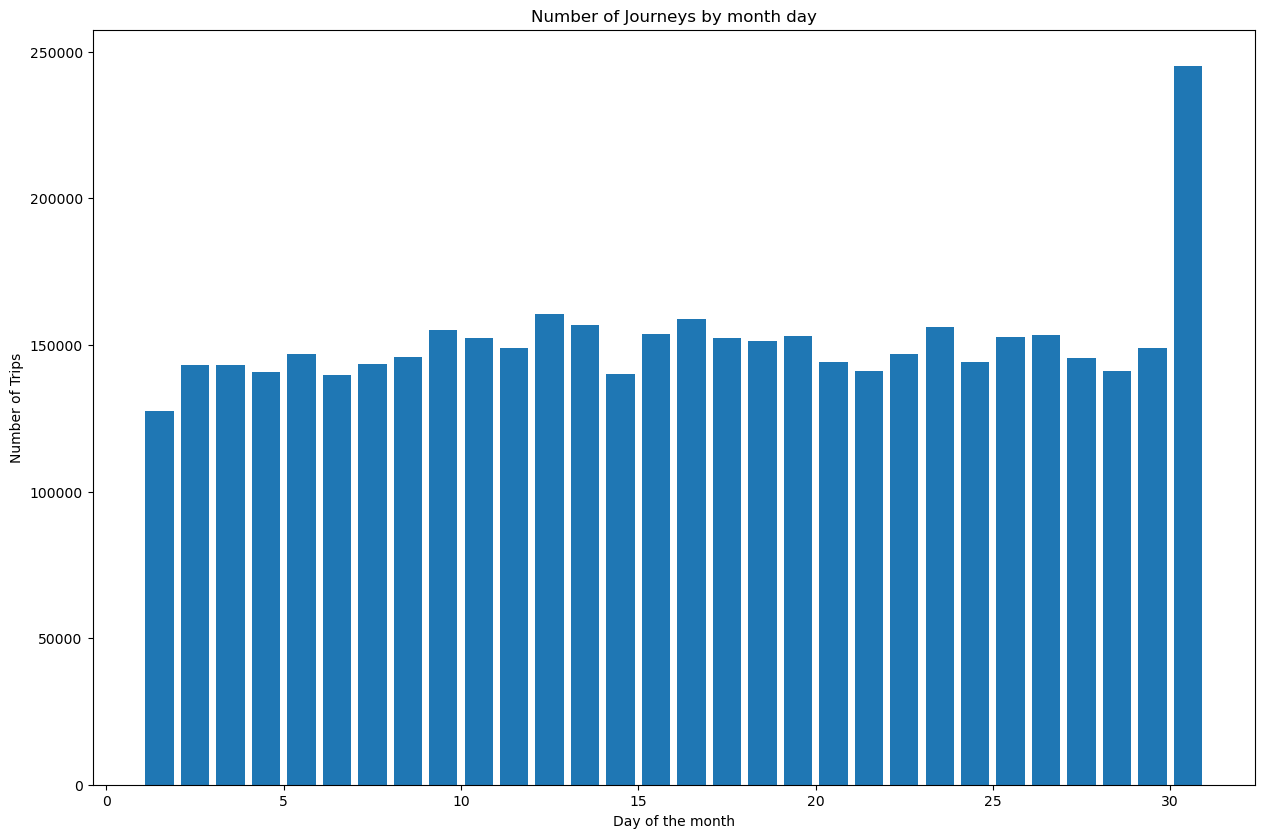

In [100]:
plt.figure(figsize=(15,10), dpi=100)
plt.hist(df['day'], bins=30, rwidth=0.8)
plt.xlabel('Day of the month')
plt.ylabel('Number of Trips')
plt.title('Number of Journeys by month day')

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='day', ylabel='Density'>

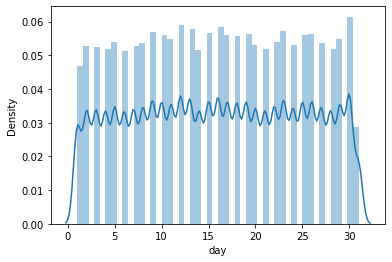

In [102]:
sns.distplot(df['day'])

### From the figure seems the end days of the month has the max rides
***